# Phân tích đơn biến & đa biến sử dụng thư viện AutoViz trên dữ liệu Marketing Campaign

## CÀI ĐẶT CÁC THƯ VIỆN CẦN THIẾT


In [ ]:
## python -m !pip install autoviz pandas matplotlib seaborn scikit-learn ydata-profiling dtale

## NHẬP THƯ VIỆN

In [44]:
# NHẬP THƯ VIỆN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from autoviz.AutoViz_Class import AutoViz_Class

## NẠP DỮ LIỆU

In [47]:
df = pd.read_csv("marketing_campaign.csv", sep="\t", engine="python")

print("Kích thước dữ liệu:", df.shape)
print("Các cột dữ liệu:\n", df.columns.tolist())
df.head()

Kích thước dữ liệu: (2240, 29)
Các cột dữ liệu:
 ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Kiểu dữ liệu và thông tin cột

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Kiểm tra giá trị thiếu

In [50]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## THỐNG KÊ MÔ TẢ

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.00,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Kidhome,2240.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,2240.00,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntWines,2240.00,303.94,336.60,0.00,23.75,173.50,504.25,1493.00
MntFruits,2240.00,26.30,39.77,0.00,1.00,8.00,33.00,199.00
MntMeatProducts,2240.00,166.95,225.72,0.00,16.00,67.00,232.00,1725.00
MntFishProducts,2240.00,37.53,54.63,0.00,3.00,12.00,50.00,259.00


## Chuyển đổi kiểu dữ liệu ngày

In [52]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Dt_Customer"].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

## Danh sách biến số và biến phân loại

In [53]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Biến số:", num_cols[:5], "...")
print("Biến phân loại:", cat_cols[:5], "...")


Biến số: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome'] ...
Biến phân loại: ['Education', 'Marital_Status', 'Dt_Customer'] ...


## Biểu đồ phân bố (Histogram)

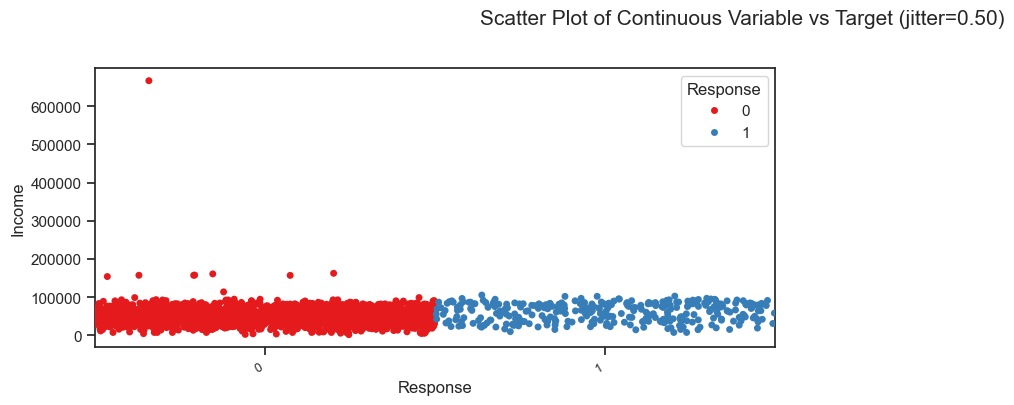

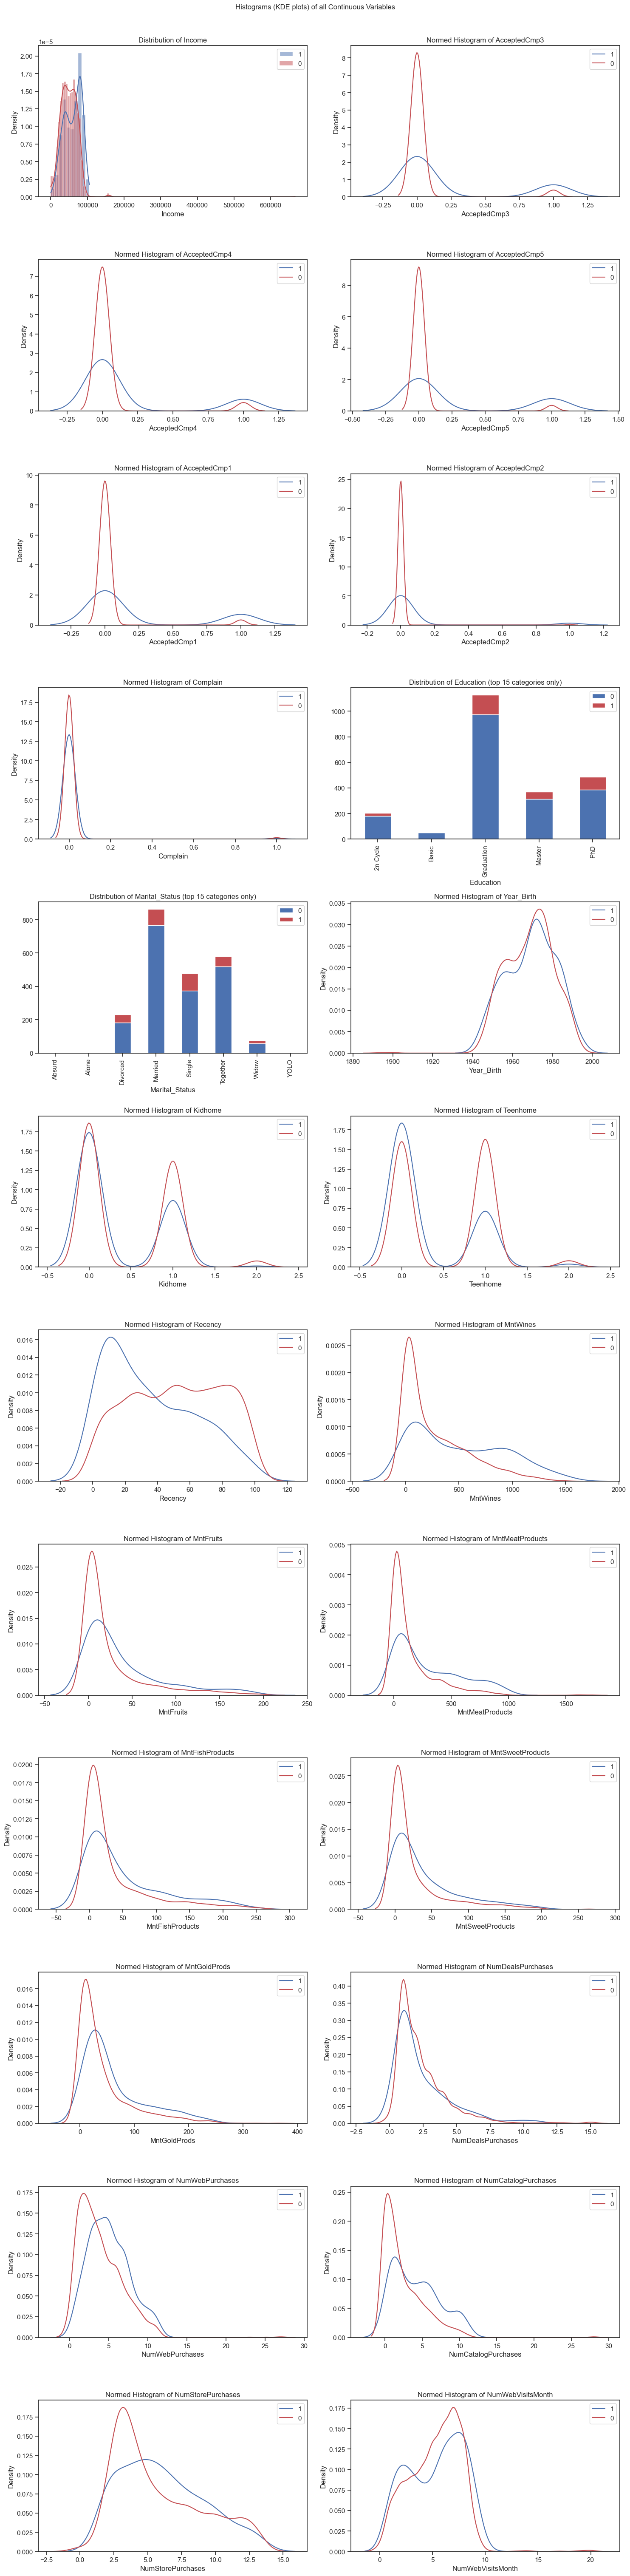

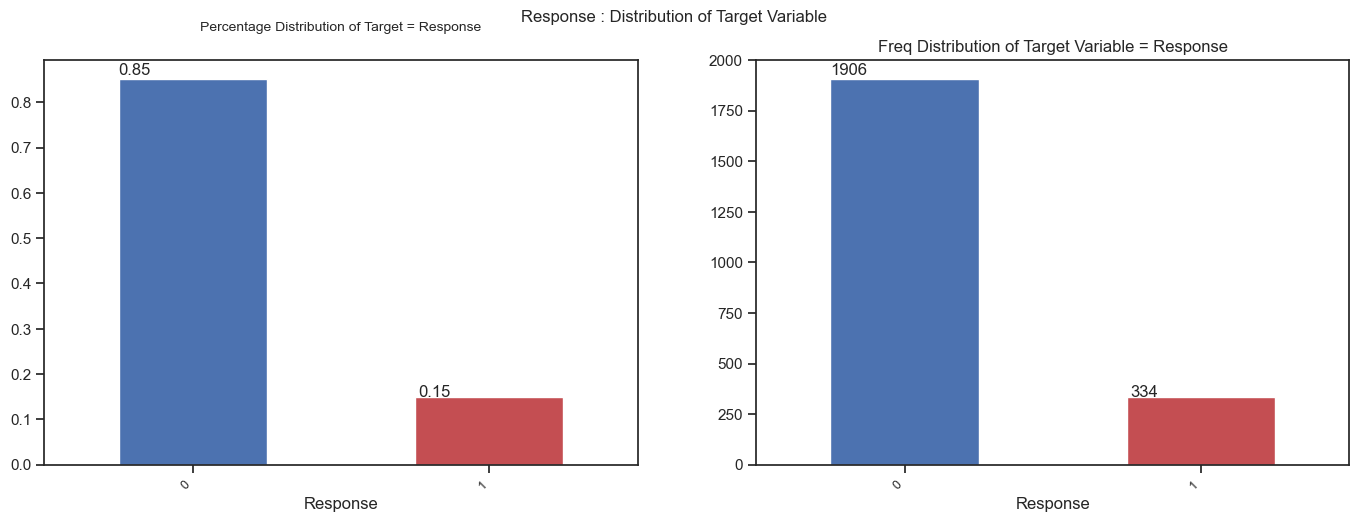

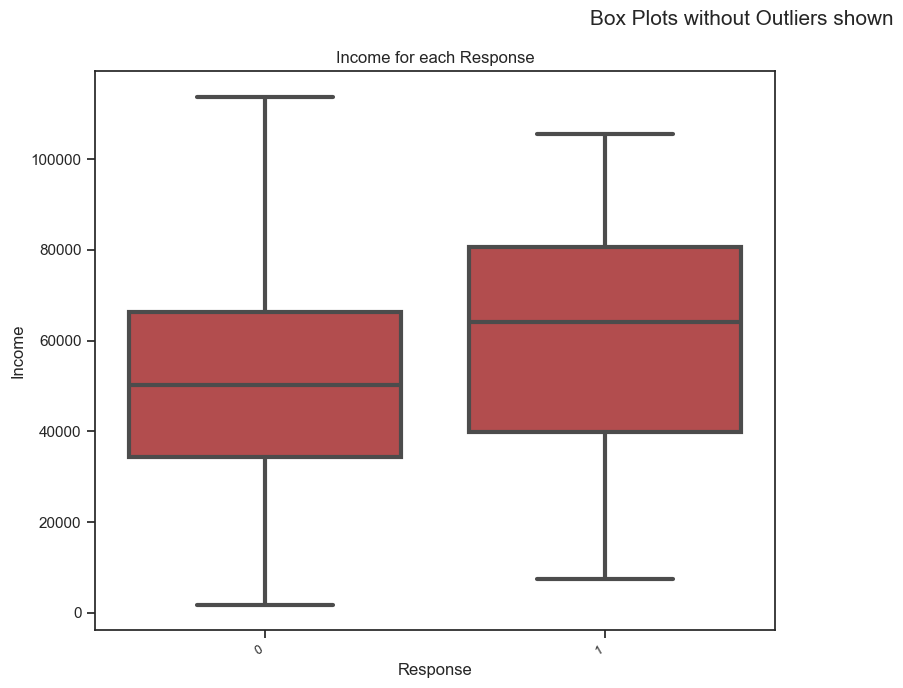

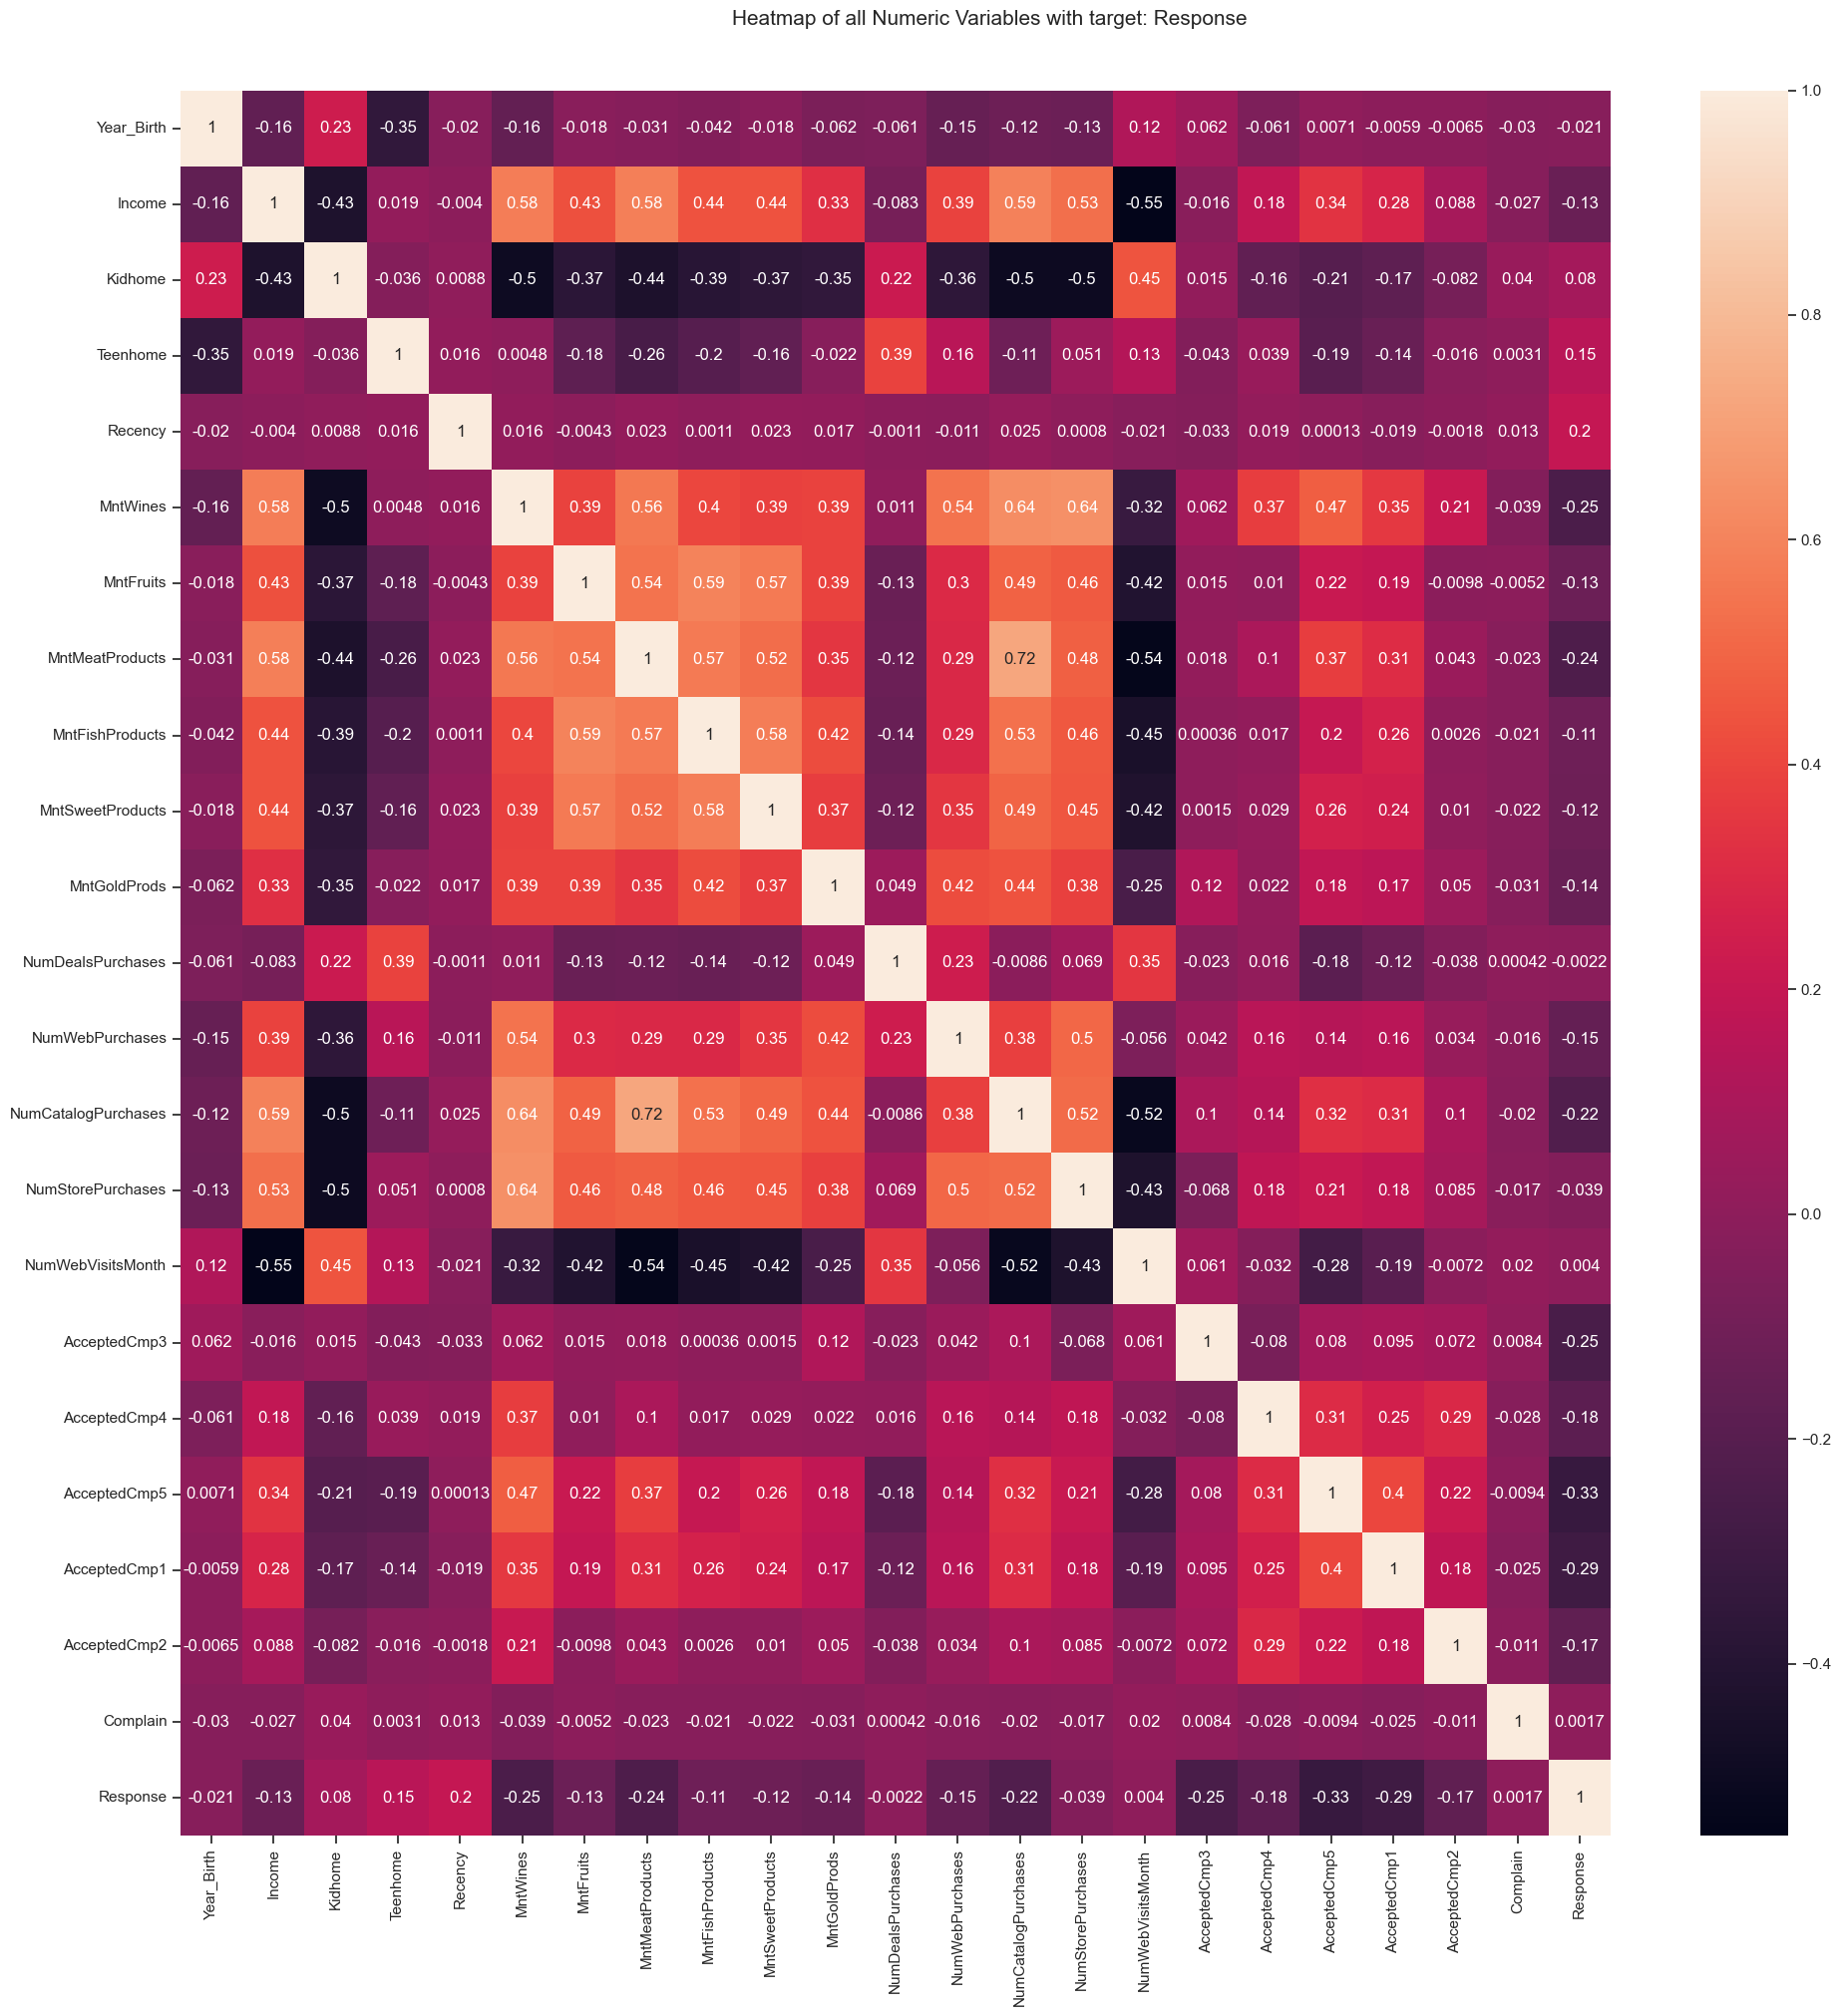

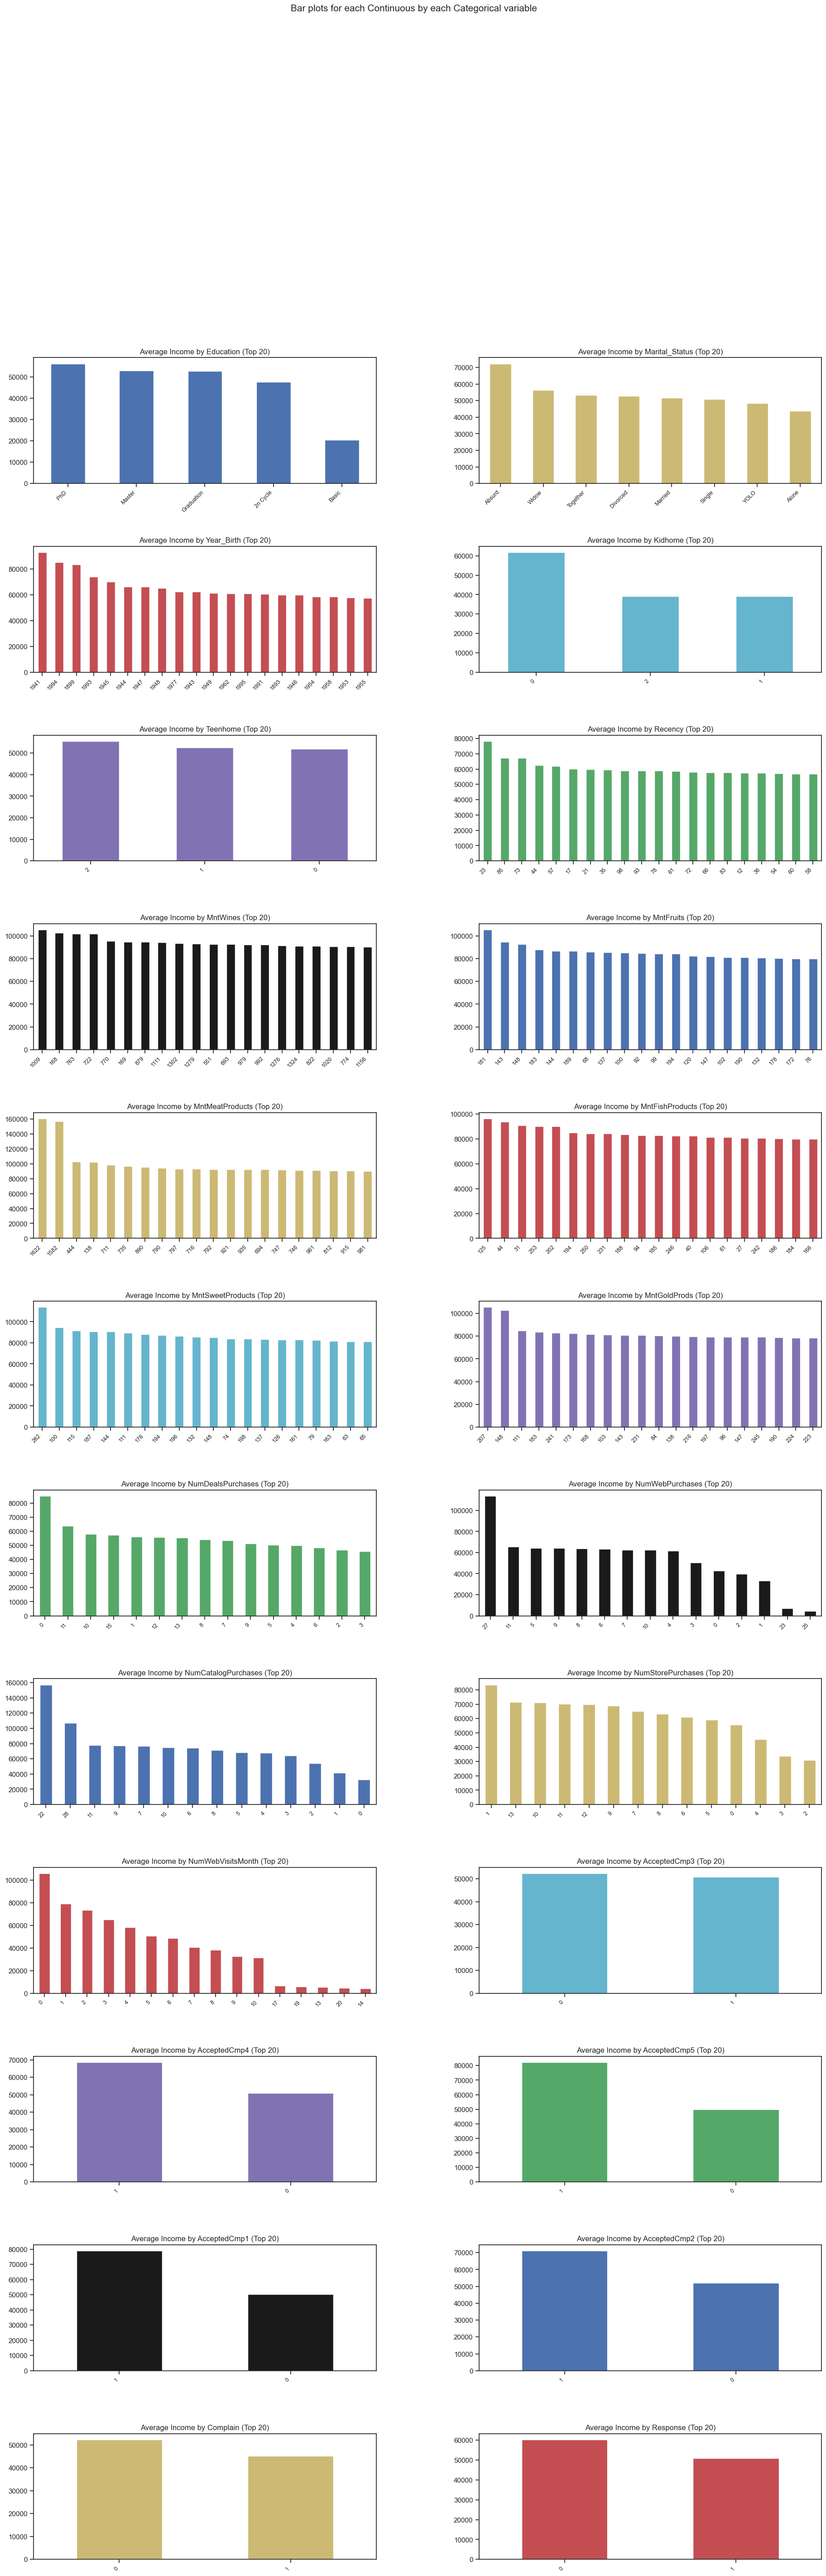

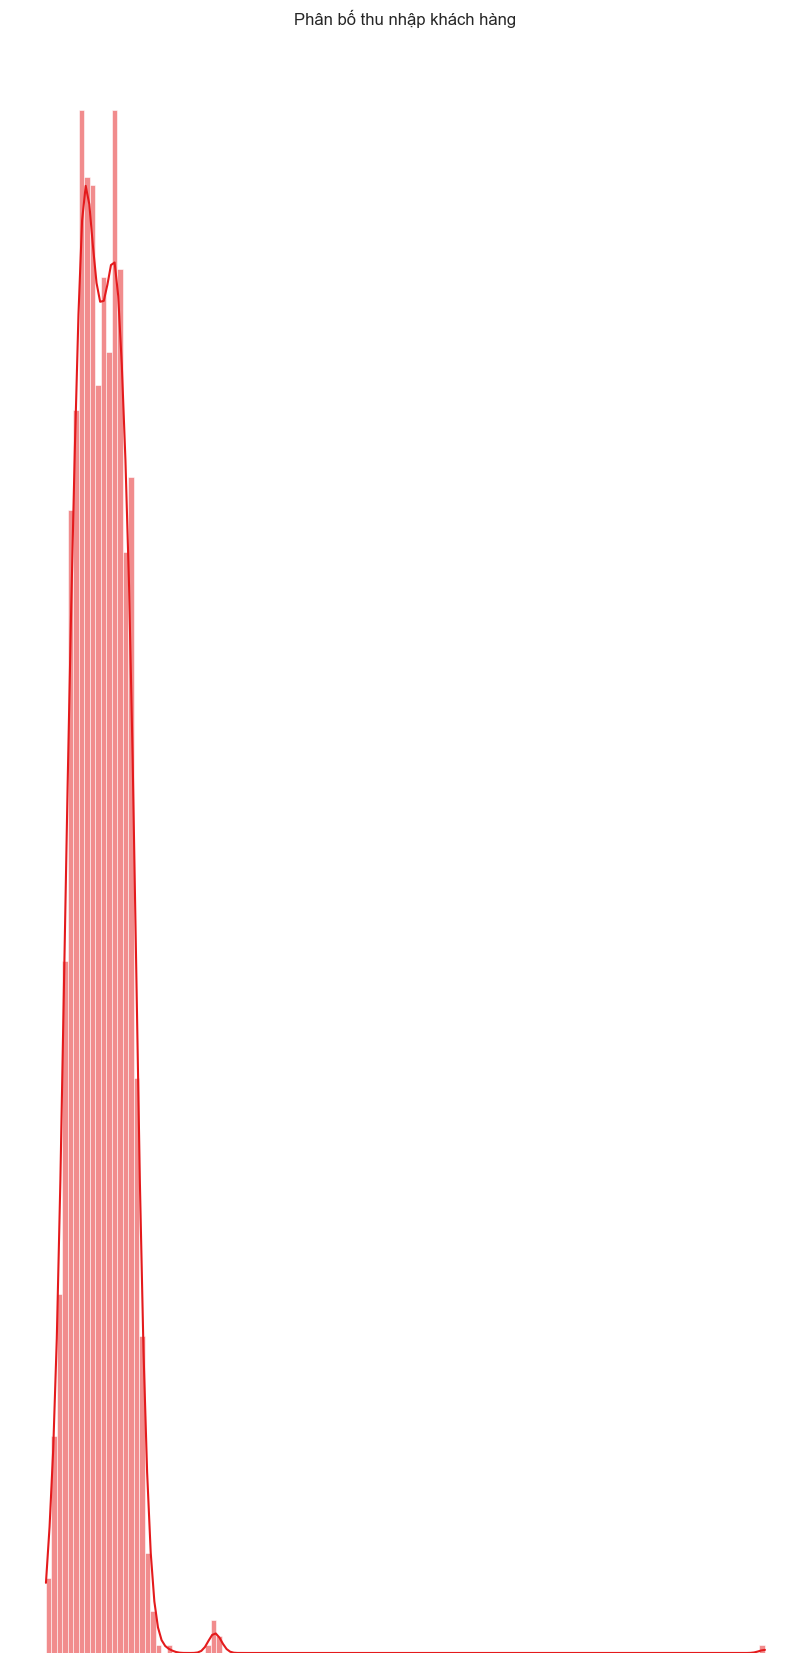

In [61]:
sns.histplot(df["Income"], kde=True)
plt.title("Phân bố thu nhập khách hàng")
plt.show()


## Boxplot phát hiện ngoại lệ

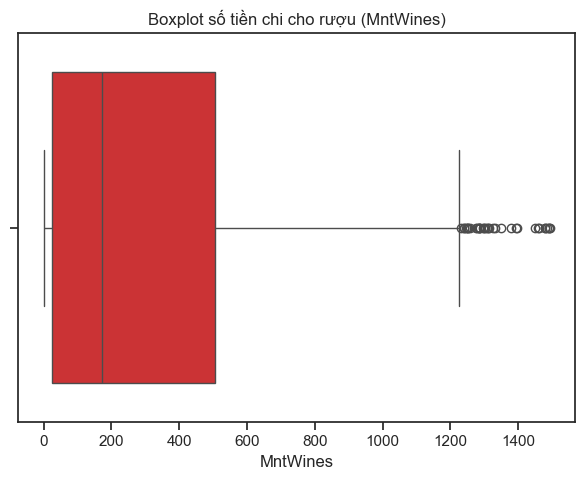

In [62]:
sns.boxplot(x=df["MntWines"])
plt.title("Boxplot số tiền chi cho rượu (MntWines)")
plt.show()

## Biểu đồ cột biến phân loại

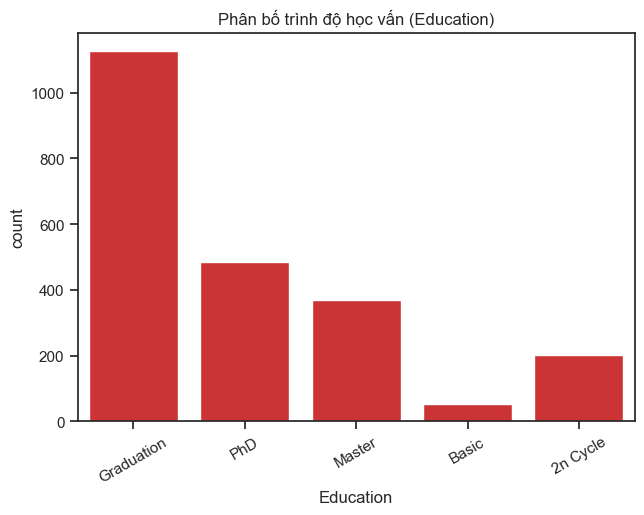

In [56]:
sns.countplot(x="Education", data=df)
plt.title("Phân bố trình độ học vấn (Education)")
plt.xticks(rotation=30)
plt.show()


## Heatmap tương quan

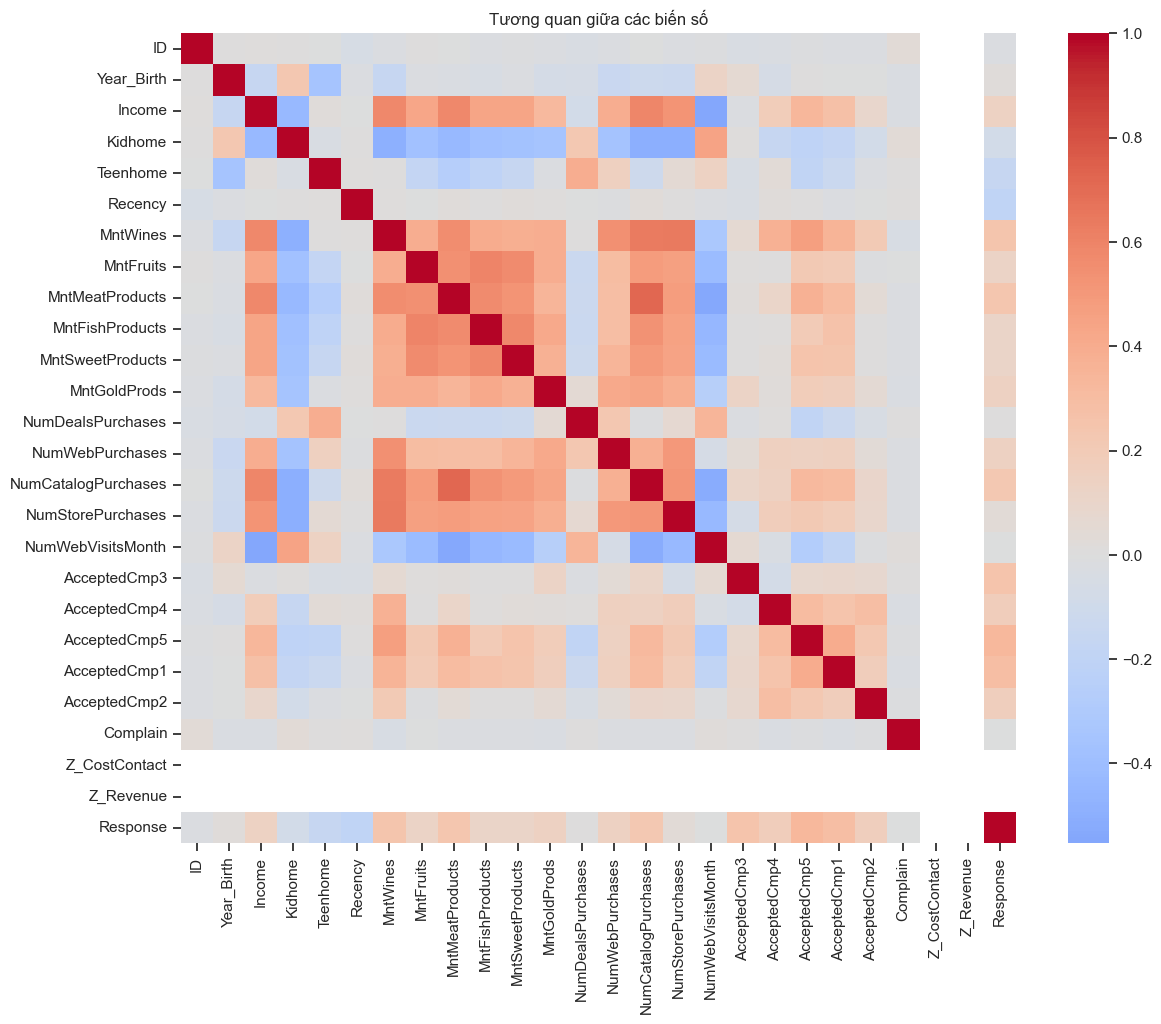

In [57]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Tương quan giữa các biến số")
plt.show()


## Pairplot đa biến

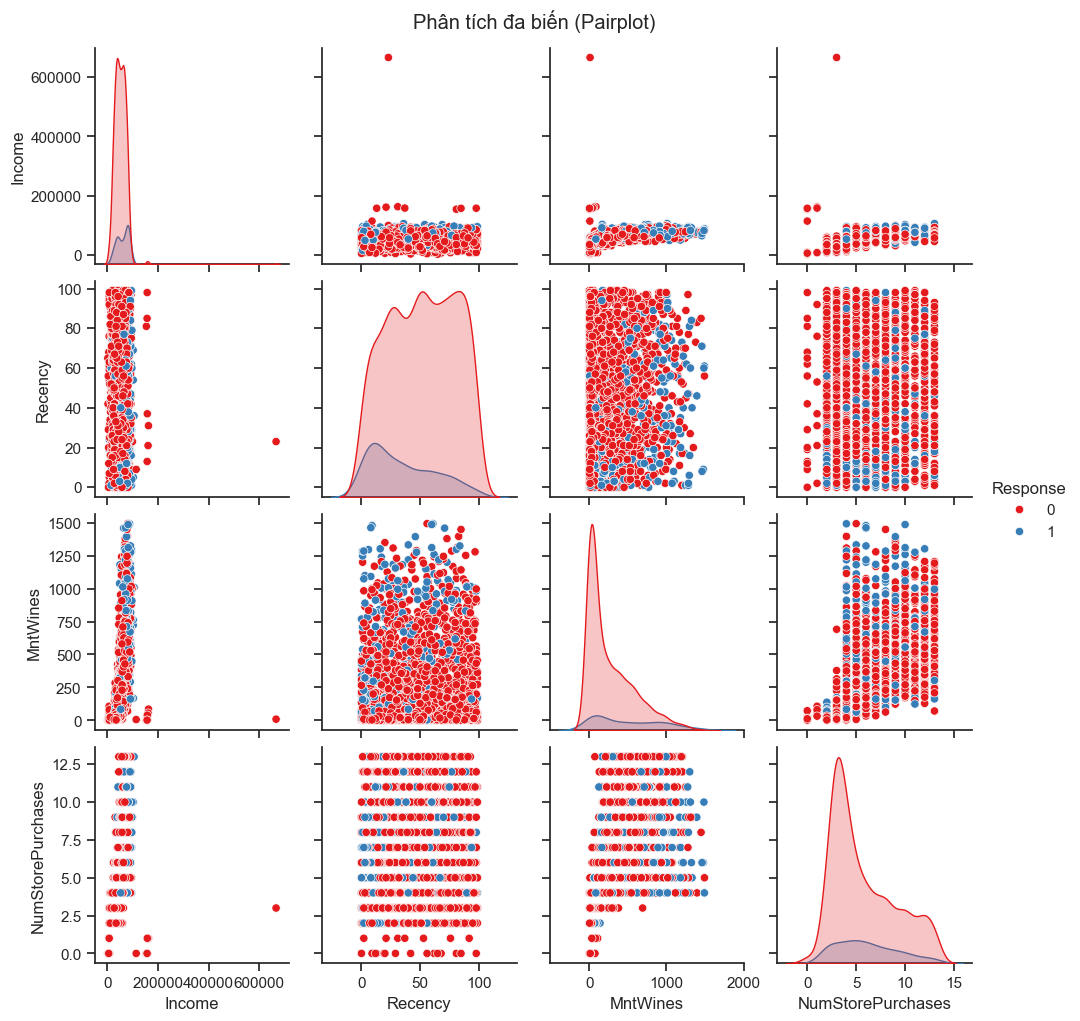

In [58]:
sns.pairplot(df[["Income", "Recency", "MntWines", "NumStorePurchases", "Response"]], hue="Response")
plt.suptitle("Phân tích đa biến (Pairplot)", y=1.02)
plt.show()


## Boxplot theo biến mục tiêu

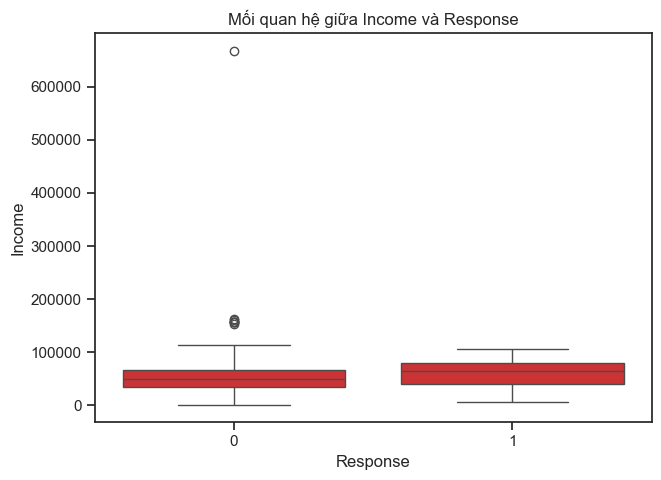

In [59]:
sns.boxplot(x="Response", y="Income", data=df)
plt.title("Mối quan hệ giữa Income và Response")
plt.show()


## Tự động phân tích với AutoViz

In [60]:
AV = AutoViz_Class()
df_auto = AV.AutoViz(
    filename="marketing_campaign.csv",
    sep="\t",
    depVar="Response",
    dfte=None,
    header=0,
    verbose=2,
    chart_format="png",
    max_rows_analyzed=40000,
)


Shape of your Data Set loaded: (2240, 29)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['Income']
    Integer-Categorical Columns: ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    String-Categorical Columns: ['Education', 'Marital_Status']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']
    Discrete String Columns: ['Dt_

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Year_Birth,int64,0.000000,2,1893.000000,1996.000000,Column has 3 outliers greater than upper bound (2004.00) or lower than lower bound(1932.00). Cap them or remove them.
Education,object,0.000000,0,,,No issue
Marital_Status,object,0.000000,0,,,"3 rare categories: ['Alone', 'Absurd', 'YOLO']. Group them into a single category or drop the categories."
Income,float64,1.166181,NA,1730.000000,666666.000000,"24 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 8 outliers greater than upper bound (117909.50) or lower than lower bound(-13900.50). Cap them or remove them."
Kidhome,int64,0.000000,0,0.000000,2.000000,No issue
Teenhome,int64,0.000000,0,0.000000,2.000000,No issue
Dt_Customer,object,0.000000,32,,,Possible high cardinality column with 663 unique values: Use hash encoding or text embedding to reduce dimension.
Recency,int64,0.000000,4,0.000000,99.000000,No issue
MntWines,int64,0.000000,37,0.000000,1493.000000,Column has 33 outliers greater than upper bound (1225.50) or lower than lower bound(-698.50). Cap them or remove them.
MntFruits,int64,0.000000,7,0.000000,199.000000,Column has 207 outliers greater than upper bound (81.00) or lower than lower bound(-47.00). Cap them or remove them.


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Could not draw wordcloud plot for Dt_Customer. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots are saved in .\AutoViz_Plots\Response
Time to run AutoViz = 6 seconds 


# KẾT THÚC